# <center>Perturbation</center>

Now we try to get similar results as in <i>Linear Response</i> part of the project, but now we are not going to use Linear Response Theory. Instead we'll modify Heisenberg model hamiltonian by adding a small perturbation to it. Perturbation Theory is a powerful approximation used to get insights into slightly disrupted quantum system. In our case perturbation is going to be:

### <center>$\delta\hat{H}(t < 0) = h\sum_icos(qi)\hat{S}_i^z$</center>

Where $\delta\hat{H}(t < 0)$ is a perturbation calculated for negative time before we start calculating operator's $\hat{S}_i^z$ time evolution, $cos(qi)$ will create wave modulations and $h$ is a factor we're going to optimize to get satisfying results. Added to our unperturbed hamiltonian we get:

### <center>$\hat{H}_P = \frac{J}{2}\sum_{i=1}^{L-1}\left(\hat{S}_i^+\hat{S}_{i+1}^- + \hat{S}_i^-\hat{S}_{i+1}^+ \right) + J\Delta\sum_{i=1}^{L-1}\hat{S}_i^z\hat{S}_{i+1}^z + \delta\hat{H}(t < 0)$</center>

After creating the hamiltonian we evolve in time the ground state $|\psi_0\rangle$:

### <center>$\langle \hat{S}_i^z\rangle(t) = \langle \psi_0(t)|\hat{S}_i^z|\psi_0(t)\rangle$</center>

Then we store the dynamic behavior of considered system and apply a <i>Fourier Transform</i> to it:

## <center>$\tilde{S}(q, \omega) = \left| \sum_ie^{lqi}\sum_te^{i\omega t}\langle \hat{S}_i^z(t)\rangle\right|^2$</center>

Which should get us the same <i>Linear Response</i>. $l$ is an imaginary unit. Let's implement it in a code.

In [1]:
import sys
sys.path.append('..')

In [2]:
from OperatorFunctions import wave_vector
from HamiltonianClass import QuantumState
from IPython.display import display, Latex
import numpy as np
import ipywidgets
from matplotlib import pyplot as plt

# variable used to improve notation
rangle = r'\rangle'
hat_H = r'\hat{H}'

In [3]:
L = 4
J = 1
delta = 1
h = 1
quantum_state = QuantumState(L, J, delta, is_reduced=True, is_pbc=True)

k_list = [k for k in range(L + 1)]
wave_vectors = [wave_vector(L, k) for k in k_list]

We begin by creating a perturbation hamiltonian $\delta\hat{H}(t < 0) = h\sum_icos(qi)\hat{S}_i^z$:

In [4]:
q = wave_vector(L, 3)
perturbation = quantum_state.get_wave_vector_perturbation(h, q)
perturbation.print()

  -1.0000e+00            0            0            0            0            0
            0   1.6452e-16            0            0            0            0
            0            0  -1.0000e+00            0            0            0
            0            0            0   1.0000e+00            0            0
            0            0            0            0  -1.6452e-16            0
            0            0            0            0            0   1.0000e+00


Whole hamiltonian with perturbation added to it:

Text(0.5, 1.0, '$\\hat{H}_P$ operator:')

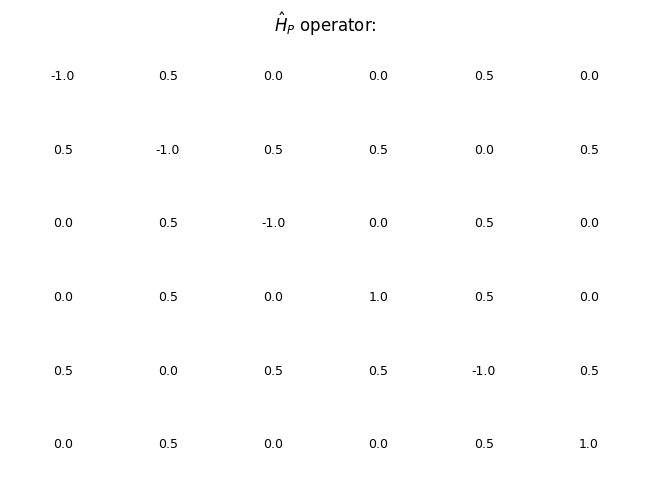

In [5]:
H_P = perturbation + quantum_state.get_hamiltonian()

figure1, axes1 = plt.subplots(1, 1, layout='constrained')
quantum_state.plot_data(matrix=H_P, axes=axes1)
axes1.set_title(r'$\hat{H}_P$ operator:')

Parameters can be tweaked below:

In [6]:
def plot_perturbation_hamiltonian(wave_vector_number=0, h=1):
    L=4
    state = QuantumState(L, 1, 1, is_pbc=True, is_reduced=True)
    perturbation = quantum_state.get_wave_vector_perturbation(h, wave_vector(L, wave_vector_number))
    H_P = perturbation + quantum_state.get_hamiltonian()
    
    figure, axes = plt.subplots(1, 1, layout='constrained')
    axes.set_title('$\hat{H}_P$ operator:')
    state.plot_data(matrix=H_P, axes=axes)
    plt.show()

In [7]:
ipywidgets.interact(plot_perturbation_hamiltonian, 
                    wave_vector_number=(0, 4, 1),
                    h=(0.01, 10, 0.1))

interactive(children=(IntSlider(value=0, description='wave_vector_number', max=4), FloatSlider(value=1.0, desc…

<function __main__.plot_perturbation_hamiltonian(wave_vector_number=0, h=1)>

Now we need to get a ground state $|\psi_{H_P}^0\rangle$ from perturbed hamiltonian.

In [8]:
ground_state = quantum_state.get_nth_eigenvector(0)
quantum_state.eigenstates(add_perturbation=perturbation)
ground_state_perturbed = quantum_state.get_nth_eigenvector(0)
quantum_state.print_state_vector()

0.2887|0011> - 0.5774|0101> + 0.2887|0110> + 0.2887|1001> - 0.5774|1010> + 0.2887|1100>


Let's compare two state vectors:

   0.2887
  -0.5774
   0.2887
   0.2887
  -0.5774
   0.2887
   0.4467
  -0.5227
   0.4467
   0.1649
  -0.5227
   0.1649


TypeError: object of type 'numpy.float64' has no len()

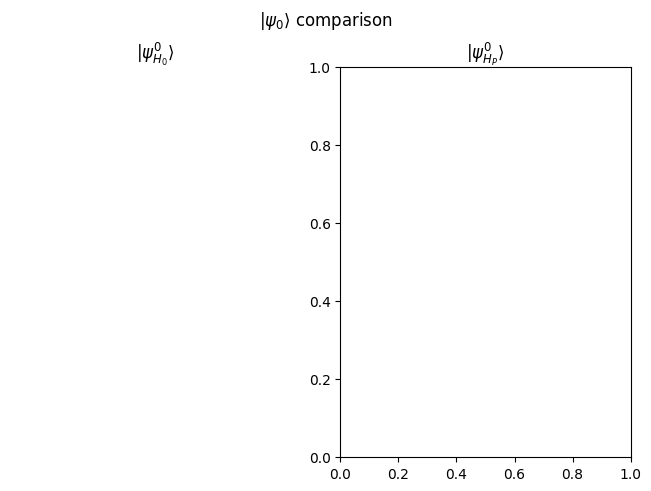

In [11]:
fig2, ax2 = plt.subplots(1, 2, layout='constrained')
fig2.suptitle(f'$|\psi_0{rangle}$ comparison')
ax2[0].set_title(r'$|\psi_{H_0}^0' + f'{rangle}$')
ax2[1].set_title(r'$|\psi_{H_P}^0' + f'{rangle}$')
ground_state.print()
ground_state_perturbed.print()
quantum_state.plot_data(matrix=ground_state, axes=ax2[0])
quantum_state.plot_data(matrix=ground_state_perturbed, axes=ax2[1])
plt.show()